**4101553 Métodos Numéricos aplicados a la Ingenieria Civil**
-
Departamento de Ingeniería Civil

Universidad Nacional de Colombia

Sede Manizales

**Docente:** Juan Nicolás Ramírez Giraldo ([jnramirezg@unal.edu.co](mailto:jnramirezg@unal.edu.co))

"*Cum cogitaveris quot te antecedant, respice quot sequantur*" (**Séneca**)


[Repositorio de la asignatura](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/)

---

**Unidad 2: Interpolación**
-

**Contenido**
- 2.1. Interpolación polinómica
- 2.2. Interpolación con trazadores
- 2.3. Interpolación en varias dimensiones
- 2.4. Vecinos más cercanos - distancia inversa ponderada
- 2.5. Comandos en Python de interpolación

---

# **2.2. Interpolación con trazadores**

En la interpolación polinómica para n + 1 puntos asociados con datos se obtenían polinómios de grado n, es decir, para un conjunto de nueve datos se obtenía un polinomio de grado ocho, con la principal ventaja de que la función interpoladora es continua y sus n derivadas también. Al tener muchos datos, grado del polinomio podía aumentar de tal manera que se empezaban a tener problemas de oscilaciones.

La propuesta de la interpolación con trazadores (splines) consiste en colocar polinomios de grado inferior en subconjuntos de los puntos asociados con datos. Estos polinomios conectores se denominan **trazadores** o **splines**.

---

- 2.2.1. Trazadores lineales
- 2.2.2. Trazadores cuadráticos
- 2.2.3. Trazadores cúbicos

---

Importación de librerías necesarias:

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x')  # Se define un x simbólico global.

---

# **2.2.1. Trazadores lineales**

La unión más simple entre dos puntos es una línea recta. Los trazadores de primer grado para un grupo de puntos asociados con datos ordenados pueden definirse como un conjunto de funciones lineales:

$f(x) = f(x_0) + m_0(x-x_0)$ en el intervalo $x_0 \leq x \leq x_1$

$f(x) = f(x_1) + m_1(x-x_1)$ en el intervalo $x_1 \leq x \leq x_2$

.
.
.

$f(x) = f(x_{n-1}) + m_{n-1}(x-x_{n-1})$ en el intervalo $x_{n-1} \leq x \leq x_{n}$

donde $m_i$ es la pendiente de la línea recta que une los puntos:

$\fbox{$m_i = \displaystyle\frac{f(x_{i+1}) - f(x_i)}{x_{i+1}-x_i}$}$


En sintesis: se hace una **interpolación lineal** entre el primer y segundo punto, entre el segundo y tercer punto, entre el n-1 y el n punto.

---



**Implementación del método**

Definción de un conjunto de puntos ($x_{p_i}$, $y_{p_i}$):

In [3]:
xp = [4.5, 3.0, 7.0, 9.0]
yp = [1.0, 2.5, 2.5, 0.5]

In [4]:
n = len(xp)  # Cantidad de puntos.

Se orden los datos y se convierten a np.array():

In [5]:
pto = np.array([np.array(xp, dtype=float), np.array(yp, dtype=float)]).T

In [6]:
pto[np.lexsort(np.fliplr(pto).T)]

array([[3. , 2.5],
       [4.5, 1. ],
       [7. , 2.5],
       [9. , 0.5]])

In [7]:
pto = pto[np.lexsort(np.fliplr(pto).T)]

In [8]:
xp = pto[:, 0]

In [9]:
yp = pto[:, 1]

In [10]:
xp

array([3. , 4.5, 7. , 9. ])

In [11]:
yp

array([2.5, 1. , 2.5, 0.5])

---

Creación de las funciones lineales:

- Pendiente de las rectas

In [12]:
mi = (yp[1:]-yp[:-1]) / (xp[1:]-xp[:-1])

In [13]:
mi

array([-1. ,  0.6, -1. ])

- Función entre cada par de puntos

In [14]:
yp[:-1] + mi*(x-xp[:-1])

array([5.5 - 1.0*x, 0.6*x - 1.7, 9.5 - 1.0*x], dtype=object)

In [15]:
yi = yp[:-1] + mi*(x-xp[:-1])

In [16]:
yi[2]

9.5 - 1.0*x

---

Función que al ingresarle:
- xg: un conjunto de puntos de evaluación.
- xp: valores en x de un conjunto de puntos asociados a datos.
- yp: valores en y de un conjunto de puntos asociados a datos.

Retorna la interpolación mediante trazadores lineales de los puntos asociados a datos en forma de np.array.

In [17]:
def f(xg, xp, yp):
    x = sp.symbols('x')  # Variable simbólica general.
    n = len(xp)          # Cantidad de puntos.
    pto = np.array([np.array(xp), np.array(yp)]).T  # Conversión a np.array()
    pto = pto[np.lexsort(np.fliplr(pto).T)]         # Ordena de acuerdo con x.
    xp = pto[:, 0]
    yp = pto[:, 1]
    
    mi = (yp[1:]-yp[:-1]) / (xp[1:]-xp[:-1])  # Pendiente
    yi = yp[:-1] + mi*(x-xp[:-1])             # Función simbólica i.
    
    y = 0  # Espacio de memoria para solución.
    
    # Primer intervalo
    f0 = sp.lambdify(x, yi[0])  # Se convierte en función la primera ecuación.
    linf = xp[0]<=xg            # Si es mayor que el primer punto: 1, de  lo contrario 0.
    lsup = xg<=xp[1]            # Si es menor que el segundo punto: 1, de lo contrario 0.
    y += linf*lsup * f0(xg)
    
    # Los otros intervalos
    for i in  range(1, n-1):
        fi = sp.lambdify(x, yi[i])  # Se convierte en función i en ecuación.
        linf = xp[i]<xg             # Si es mayor que el punto i: 1, de  lo contrario 0.
        lsup = xg<=xp[i+1]          # Si es menor que el punto i+1: 1, de lo contrario 0.
        y += linf*lsup * fi(xg)

    return y

Ver: [20-trazadores_lineales.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/20-trazadores_lineales.py)

---

Ejemplo 1:

In [18]:
xp = [4.5, 3.0, 7.0, 9.0]
yp = [1.0, 2.5, 2.5, 0.5]

In [19]:
xg = np.linspace(min(xp), max(xp),1000)
yg = f(xg, xp, yp)

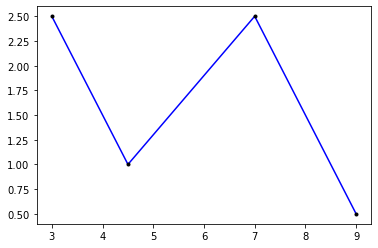

In [20]:
plt.plot(xg, yg, 'b')
plt.plot(xp, yp, 'k.')

---

Ejemplo 2:

In [21]:
xp = [-15, -12, -10, 0, 3, 3.5, 7, 8]
yp = [  1,   2,   3, 4, 5,   6, 7, 8]

In [22]:
xg = np.linspace(min(xp), max(xp),1000)
yg = f(xg, xp, yp)

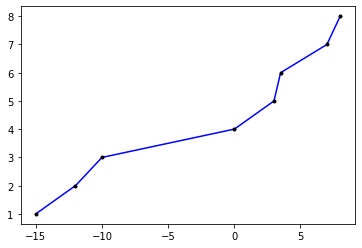

In [23]:
plt.plot(xg, yg, 'b')
plt.plot(xp, yp, 'k.')

---

# **2.2.2. Trazadores cuadráticos**

Tiene la ventaja de que la primera derivada es continua, gracias a que se usan para n+1 puntos, n polinomios.

Si se tienen 4 puntos:

In [24]:
xp = [3.0, 4.5, 7.0, 9.0]
yp = [2.5, 1.0, 2.5, 0.5]

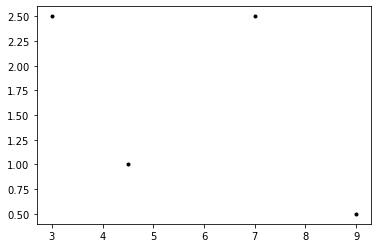

In [25]:
plt.plot(xp, yp, 'k.')

---

Habrá 3 polinomios:

- $a_1x^2 + b_1x + c_1 = f_1(x)$
- $a_2x^2 + b_2x + c_2 = f_2(x)$
- $a_3x^2 + b_3x + c_3 = f_3(x)$

En consecuencia para (n+1)=4 puntos hay n=3 polinomios, con 3*n = 9 incógnitas en total, es decir, se requieren 9 ecuaciones para hallarlas.



Los valores de la función de polinomios adyacentes deben ser
iguales en los nodos interiores. Esta condición se representa como:

Respecto al segundo punto:
- $a_1x_2^2 + b_1x_2 + c_1 = y_2$
- $a_2x_2^2 + b_2x_2 + c_2 = y_2$

Respecto al tercer punto:
- $a_2x_3^2 + b_2x_3 + c_2 = y_3$
- $a_3x_3^2 + b_3x_3 + c_3 = y_3$

---

La primera función debe pasar por el primer punto y la última función debe pasar por el últimos punto, es decir:

- $a_1x_1^2 + b_1x_1 + c_1 = y_1$
- $a_3x_4^2 + b_3x_4 + c_3 = y_4$

Las primeras derivadas en los nodos interiores deber ser iguales:

- $2a_1x_2 + b_1 = 2a_2x_2 + b_2$
- $2a_2x_3 + b_2 = 2a_3x_3 + b_3$ 

Finalmente, la última condición (ecuación) surge de asumir que la segunda derivada en el primer punto es cero:

$ 2a_1 = 0$, es decir, $a_1$=0

Reduciendo el problema de 3n-1 ecuaciones.

---

# **2.2.3. Trazadores cúbicos**

Para n+1 puntos se tienen n trazadores cúbicos.

La construcción del método es similar a la de los trazadores cuadráticos. En este caso se requieren $4n$ condiciones, las cuales se obtienen a partir de:

- Los valores de la función deben ser iguales en los nodos interiores (2n – 2 condiciones).
- La primera y última función deben pasar a través de los puntos extremos (2 condiciones).
- Las primeras derivadas en los nodos interiores deben ser iguales (n – 1 condiciones).
- Las segundas derivadas en los nodos interiores deben ser iguales (n – 1 condiciones).
- Las segundas derivadas en los nodos extremos son cero (2 condiciones).

De esta manera: 

$(2n-2) + (2) + (n-1) + (n-1) + (2) = 4n$